In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Load in the dataframe from project part 1 as basics:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', compression = 'gzip')

df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', compression = 'gzip')

In [3]:
df = pd.concat([df_2000, df_2001])

In [4]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG


In [5]:
df['budget'].value_counts()

0.0           2056
10000000.0      20
15000000.0      17
3000000.0       16
35000000.0      13
              ... 
1850000.0        1
2365000.0        1
3900000.0        1
850000.0         1
35000.0          1
Name: budget, Length: 183, dtype: int64

In [6]:
# selecting rows based on condition
df = df[(df['budget'] > 0) &
		df['revenue'] > 0]
	

## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [7]:
#Filter out movies with a budget or revenue listed
financial_info = df[(df['budget'] > 0) | (df['revenue'] > 0)]
financial_info

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R
13,tt0120630,0.0,/xWG7emUlBPhsJ2MyQHqH0poeXwm.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.756,4470.0,G
16,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.896,289.0,R
17,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.118,6087.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,tt0294289,0.0,NaN,NaN,344.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.americanadobo.com,50819.0,tl,American Adobo,...,342855.0,104.0,"[{'english_name': 'Tagalog', 'iso_639_1': 'tl'...",Released,Sex is the appetizer. Love is the main course....,American Adobo,0.0,4.400,7.0,NaN
1054,tt0296042,0.0,/aw0EeseSr10dVUuY6Aiv6HhP8UW.jpg,NaN,1400010.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9696.0,ja,殺し屋1,...,80631.0,129.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,Love really hurts.,Ichi the Killer,0.0,6.967,848.0,NaN
1166,tt0310790,0.0,/hAvu0oWrEbbPN71QC8w1NIoUYQT.jpg,"{'id': 518467, 'name': 'El Bosque Animado', 'p...",3747230.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,49612.0,gl,O Bosque Animado,...,482902.0,83.0,"[{'english_name': 'Galician', 'iso_639_1': 'gl...",Released,NaN,The Living Forest,0.0,5.400,23.0,PG
1278,tt0445841,0.0,/lO3XAxV38SC7ZuuNVdy6E6nOZac.jpg,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,zh,一個爛賭的傳說,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.800,3.0,NaN


- 359 movies have valid financial information.

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [8]:
movie_counts = df['certification'].value_counts()
movie_counts

R        143
PG-13    117
PG        30
G         13
NR         8
Name: certification, dtype: int64

G = 13
PG = 30
PG-13 = 117
R = 143

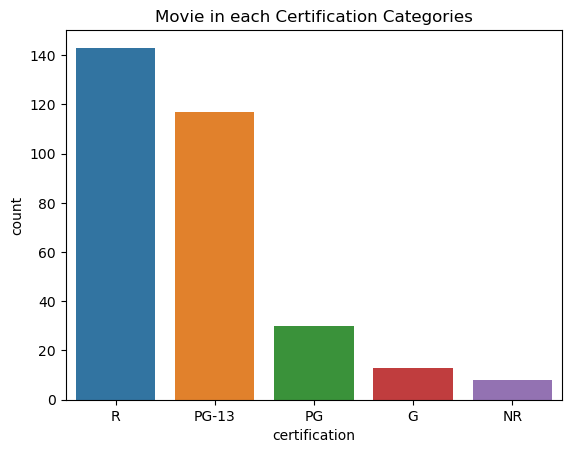

In [9]:
# Countplot of certification categories
ax = sns.countplot(data= df, x= 'certification', order = movie_counts.index)
ax.set_title('Movie in each Certification Categories');

### What is the average revenue per certification category?


In [10]:
# Calculating average revenue
avg_revenue = df.groupby('certification')['revenue'].mean()
avg_revenue

certification
G        1.332169e+08
NR       4.313393e+07
PG       1.291256e+08
PG-13    1.111018e+08
R        4.788424e+07
Name: revenue, dtype: float64

- G: $133,216,900 (133.22 million)


- NR: $43,133,930 (43.13 million)


- PG: $129,125,600 (129.13 million)


- PG-13: $111,101,800 (111.10 million)


- R: $47,884,240 (47.88 million)

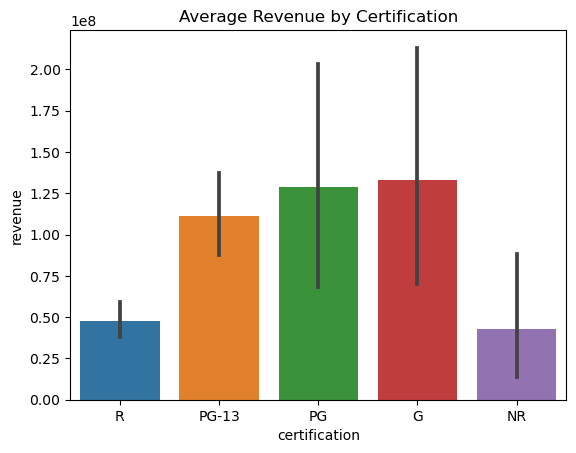

In [11]:
# Barplot of average revenue by certification
ax = sns.barplot(data = df, x= 'certification', y= 'revenue', order = movie_counts.index)
ax.set_title('Average Revenue by Certification');

### What is the average budget per certification category?

In [12]:
# Calculating average budget
avg_budget = df.groupby('certification')['budget'].mean()
avg_budget

certification
G        4.400000e+07
NR       2.371250e+07
PG       5.197491e+07
PG-13    4.662733e+07
R        2.547772e+07
Name: budget, dtype: float64

- G: $44,000,000 (44 million)


- NR: $23,712,500 (23.71 million)


- PG: $51,974,910 (51.97 million)


- PG-13: $46,627,330 (46.63 million)


- R: $25,477,720 (25.48 million)

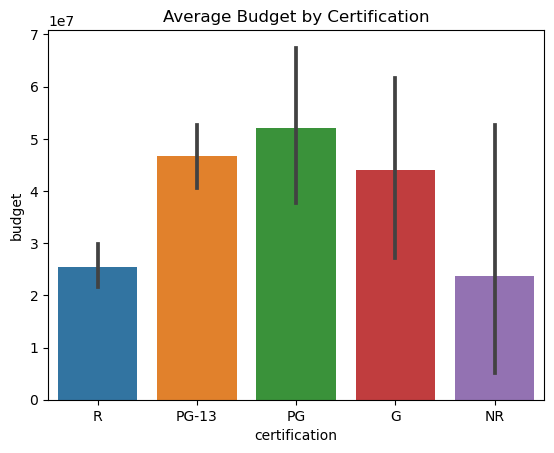

In [13]:
# Barplot of average budget by certification
ax = sns.barplot(data = df, x= 'certification', y= 'budget', order = movie_counts.index);
ax.set_title('Average Budget by Certification');

In [14]:
# Save the final results to a compressed csv
df.to_csv('Data/tmdb_results_combined.csv.gz', compression='gzip',index=False)